In [ ]:
!unzip block_7.csv.zip

Archive:  block_7.csv.zip
  inflating: block_7.csv             


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Loading the Dataset

In [ ]:
block = pd.read_csv('block_7.csv')
block.head()

,LCLid,day,hh_0,hh_1,hh_2,hh_3,hh_4,hh_5,hh_6,hh_7,...,hh_38,hh_39,hh_40,hh_41,hh_42,hh_43,hh_44,hh_45,hh_46,hh_47
0,MAC000050,2011-12-09,0.137,0.113,0.094,0.066,0.092,0.077,0.082,0.062,...,1.172,1.742,2.703,1.342,1.605,0.720,0.769,0.815,0.914,0.703
1,MAC000050,2011-12-10,0.311,0.342,0.310,0.281,0.253,0.095,0.079,0.080,...,1.811,1.790,1.335,1.521,1.200,0.777,0.634,0.636,1.065,0.938
2,MAC000050,2011-12-11,0.330,0.101,0.091,0.082,0.078,0.064,0.083,0.079,...,1.013,0.889,0.828,0.775,0.801,0.788,0.969,1.480,0.883,0.168
3,MAC000050,2011-12-12,0.088,0.083,0.098,0.085,0.083,0.083,0.092,0.086,...,1.353,1.276,2.161,1.978,2.244,1.000,0.955,0.934,0.793,0.326
4,MAC000050,2011-12-13,0.319,0.089,0.104,0.118,0.098,0.097,0.083,0.078,...,0.755,0.939,0.776,1.524,0.909,1.538,0.836,1.072,1.323,0.274


## Preparing the Data

In [ ]:
block50 = block[block['LCLid'] == block['LCLid'][0]]
block50 = block50.drop(['LCLid'], axis=1)

block50['day'].dtype

dtype('O')

In [ ]:
block50['day'] = pd.to_datetime(block50['day'])
block50 = block50.set_index('day')

#### Checking if missing days

In [ ]:
stdDF = pd.DataFrame()
stdDF['day'] = pd.date_range(block50.index.min(), block50.index.max(), freq='1D')
block50f = block50.merge(stdDF,left_index=True, right_on='day', how='right')
block50f = block50f.set_index('day')
block50.shape, block50f.shape

((494, 48), (495, 48))

In [ ]:
block50f.index.difference(block50.index)

DatetimeIndex(['2012-10-18'], dtype='datetime64[ns]', name='day', freq=None)

In [ ]:
block50f.head(10)

,day,hh_0,hh_1,hh_2,hh_3,hh_4,hh_5,hh_6,hh_7,hh_8,...,hh_38,hh_39,hh_40,hh_41,hh_42,hh_43,hh_44,hh_45,hh_46,hh_47
0,2011-12-09,0.137,0.113,0.094,0.066,0.092,0.077,0.082,0.062,0.080,...,1.172,1.742,2.703,1.342,1.605,0.720,0.769,0.815,0.914,0.703
1,2011-12-10,0.311,0.342,0.310,0.281,0.253,0.095,0.079,0.080,0.075,...,1.811,1.790,1.335,1.521,1.200,0.777,0.634,0.636,1.065,0.938
2,2011-12-11,0.330,0.101,0.091,0.082,0.078,0.064,0.083,0.079,0.074,...,1.013,0.889,0.828,0.775,0.801,0.788,0.969,1.480,0.883,0.168
3,2011-12-12,0.088,0.083,0.098,0.085,0.083,0.083,0.092,0.086,0.095,...,1.353,1.276,2.161,1.978,2.244,1.000,0.955,0.934,0.793,0.326
4,2011-12-13,0.319,0.089,0.104,0.118,0.098,0.097,0.083,0.078,0.083,...,0.755,0.939,0.776,1.524,0.909,1.538,0.836,1.072,1.323,0.274
5,2011-12-14,0.089,0.089,0.090,0.074,0.083,0.090,0.071,0.062,0.087,...,0.458,0.354,1.090,0.850,0.837,0.721,0.700,1.039,0.786,0.978
6,2011-12-15,0.096,0.094,0.076,0.081,0.077,0.089,0.065,0.071,0.091,...,0.857,0.616,0.359,0.336,0.384,0.415,0.276,0.351,0.461,0.310
7,2011-12-16,0.322,0.227,0.146,0.113,0.108,0.108,0.114,0.114,0.091,...,2.597,2.059,1.084,2.720,1.935,1.738,0.842,1.789,1.285,1.102
8,2011-12-17,0.152,0.135,0.082,0.140,0.095,0.126,0.079,0.089,0.085,...,1.016,1.001,0.973,0.999,0.990,0.989,0.990,0.997,0.947,0.879
9,2011-12-18,0.881,0.176,0.097,0.097,0.095,0.085,0.093,0.071,0.083,...,1.597,3.638,2.687,1.657,2.220,1.728,1.261,0.982,0.807,0.204


### Checking Missing Data

In [ ]:
block50f.isnull().sum()

,0
hh_0,1
hh_1,1
hh_2,1
hh_3,1
hh_4,1
hh_5,1
hh_6,1
hh_7,1
hh_8,1
hh_9,1


Apparently all columns have at least one missing value (the missing day) except for hh_30 which has another missing value. We can just use forward fill as a simple way to solve this for now.

In [ ]:
block50ff = block50f.ffill()

<Axes: xlabel='day'>

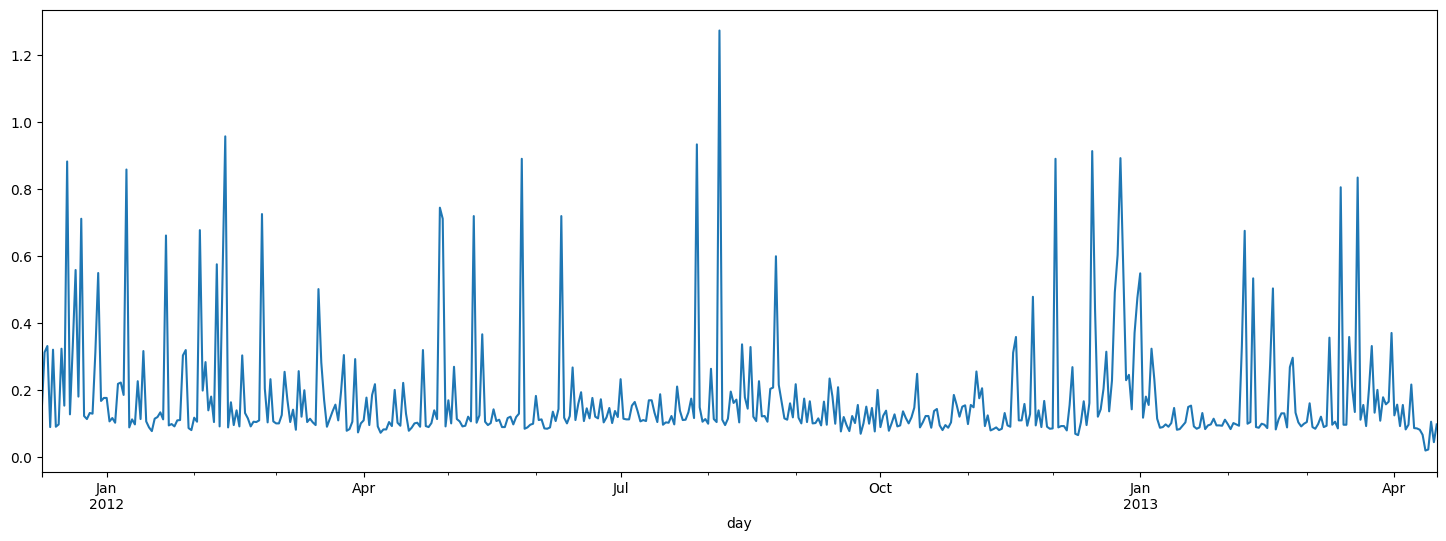

In [ ]:
block50ff['hh_0'].plot(kind='line', figsize=(18,6))

In [ ]:
df = block50ff.copy()
df['weekday_name'] = df.index.day_name()
df['weekday'] = df.index.weekday
df['week'] = df.index.isocalendar().week
df['day'] = df.index.day
df['month'] = df.index.month
df['month_name'] = df.index.month_name()
df['year'] = df.index.year
df['quarter'] = df.index.quarter

In [ ]:
df['month_name'] = pd.Categorical(df['month_name'], categories=["January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"], ordered=True)
df['weekday_name'] = pd.Categorical(df['weekday_name'], categories=["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"], ordered=True)

In [ ]:
plot_df = df.groupby(["year", "month_name"])[['hh_0',"hh_1", 'hh_2']].mean()
plot_df['hh_0'] = plot_df['hh_0'] / plot_df['hh_0'].max()
plot_df['hh_1'] = plot_df['hh_1'] / plot_df['hh_1'].max()
plot_df['hh_2'] = plot_df['hh_2'] / plot_df['hh_2'].max()
plot_df

<ipython-input-186-4709278fdd49>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  plot_df = df.groupby(["year", "month_name"])[['hh_0',"hh_1", 'hh_2']].mean()


hh_0      hh_1      hh_2
year month_name                              
2011 January          NaN       NaN       NaN
     February         NaN       NaN       NaN
     March            NaN       NaN       NaN
     April            NaN       NaN       NaN
     May              NaN       NaN       NaN
     June             NaN       NaN       NaN
     July             NaN       NaN       NaN
     August           NaN       NaN       NaN
     September        NaN       NaN       NaN
     October          NaN       NaN       NaN
     November         NaN       NaN       NaN
     December    0.959372  0.760740  0.878499
2012 January     0.631152  0.722636  0.775158
     February    0.820836  0.769285  0.865750
     March       0.543079  0.583358  0.735789
     April       0.567583  0.651958  0.697881
     May         0.577092  0.511184  0.636000
     June        0.520915  0.623606  0.721158
     July        0.550512  0.559797  0.776211
     August      0.726433  0.845362  1.000000
     September   0.445268  0.534849  0.724421
     October     0.416714  0.504921  0.664421
     November    0.507182  0.546098  0.701144
     December    1.000000  1.000000  0.896211
2013 January     0.459849  0.647182  0.740421
     February    0.617227  0.661875  0.644707
     March       0.696362  0.552490  0.749053
     April       0.329499  0.388309  0.480908
     May              NaN       NaN       NaN
     June             NaN       NaN       NaN
     July             NaN       NaN       NaN
     August           NaN       NaN       NaN
     September        NaN       NaN       NaN
     October          NaN       NaN       NaN
     November         NaN       NaN       NaN
     December         NaN       NaN       NaN

<Axes: xlabel='year,month_name'>

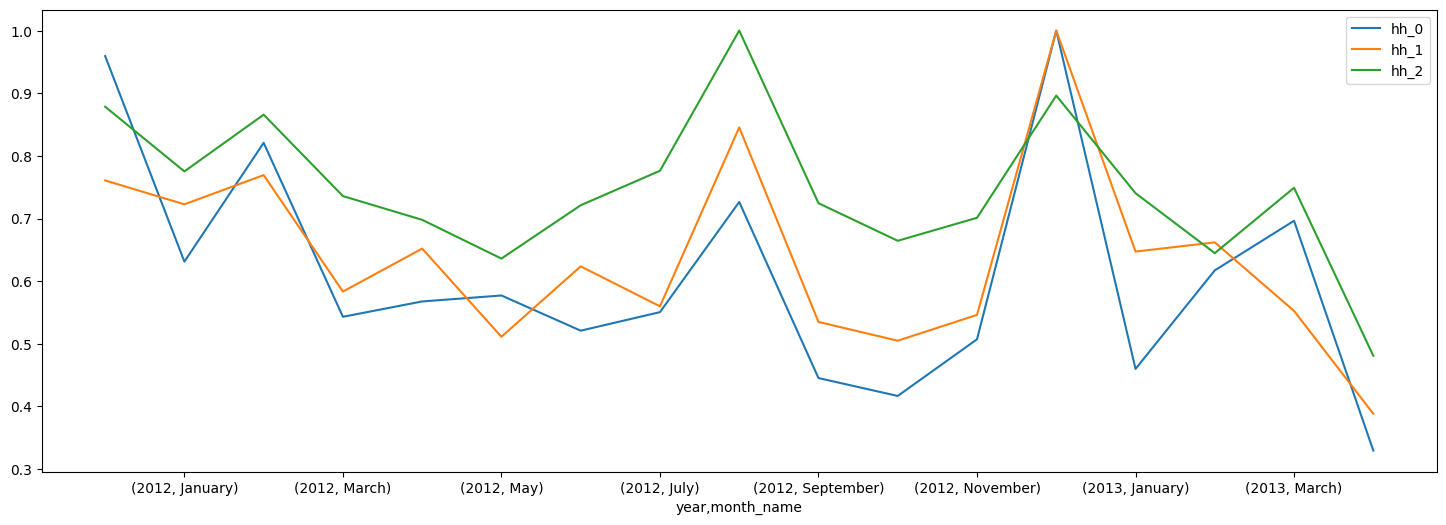

In [ ]:
plot_df.plot(figsize=(18,6))

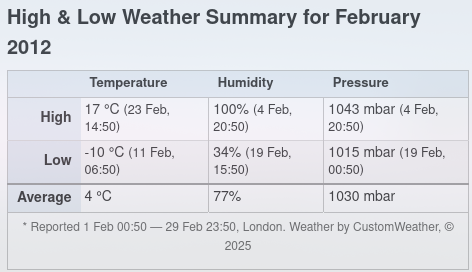

It could be the same reason for December too.

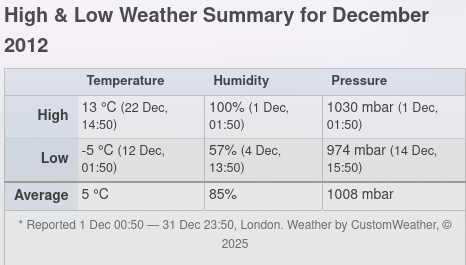

But I believe that doesn't fully interpret the high spike for December. Other reasons could be that most people spend more time at home in this period because of national and religion related holidays and winter breaks. Which lead to increased use of lights.

In [ ]:
# Define your season mapping function
def get_season(date):
    Y = 2000  # dummy year for mapping
    seasons = {
        'Winter': (pd.Timestamp(f'{Y}-12-1'), pd.Timestamp(f'{Y+1}-2-28')),
        'Spring': (pd.Timestamp(f'{Y}-3-1'), pd.Timestamp(f'{Y}-5-31')),
        'Summer': (pd.Timestamp(f'{Y}-6-1'), pd.Timestamp(f'{Y}-8-31')),
        'Autumn': (pd.Timestamp(f'{Y}-9-1'), pd.Timestamp(f'{Y}-11-30')),
    }
    d = pd.Timestamp(f'{Y}-{date.month}-{date.day}')
    for season, (start, end) in seasons.items():
        if start <= d <= end:
            return season
    return 'Winter'  # Covers Dec

# Apply it to your index
block50ff['season'] = block50ff.index.map(get_season)
block50ff['year'] = block50ff.index.year

# Special case: Dec belongs to next year's winter
block50ff.loc[block50ff.index.month == 12, 'year'] += 1


<Axes: title={'center': 'Average by Season'}, xlabel='year,season'>

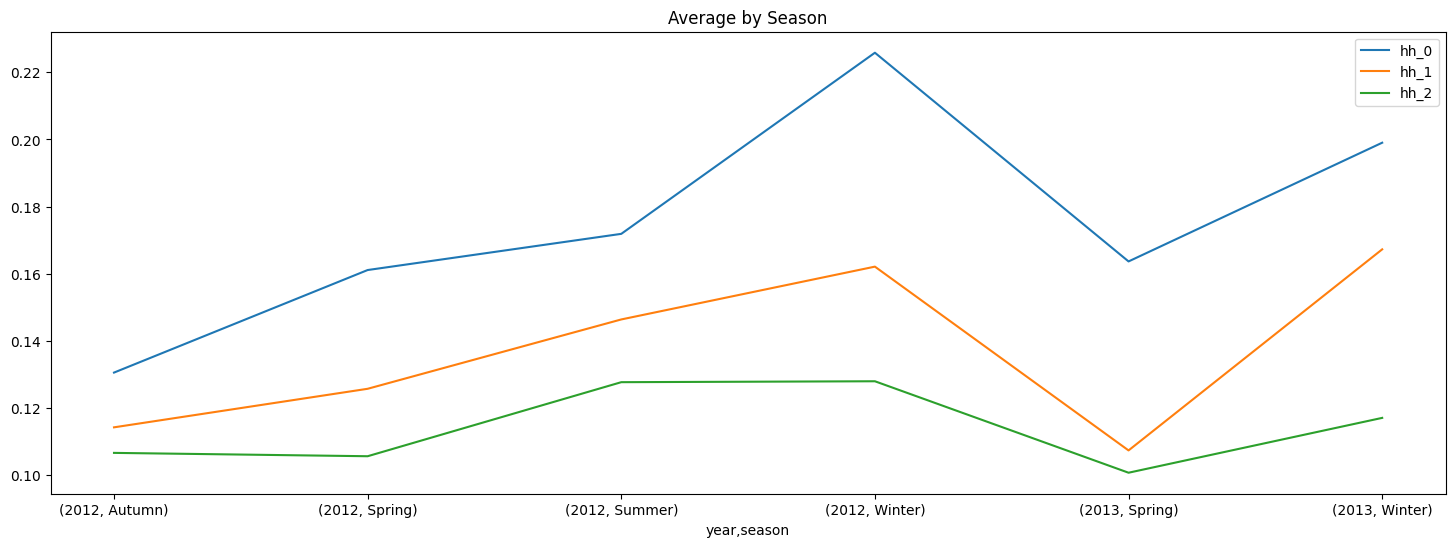

In [ ]:
season_grouped = block50ff.groupby(['year', 'season'])[['hh_0', 'hh_1', 'hh_2']].mean()
season_grouped.plot(kind='line', figsize=(18,6), title='Average by Season')


It's clear the consumbtion is correlated with winter.

<Axes: xlabel='weekday_name'>

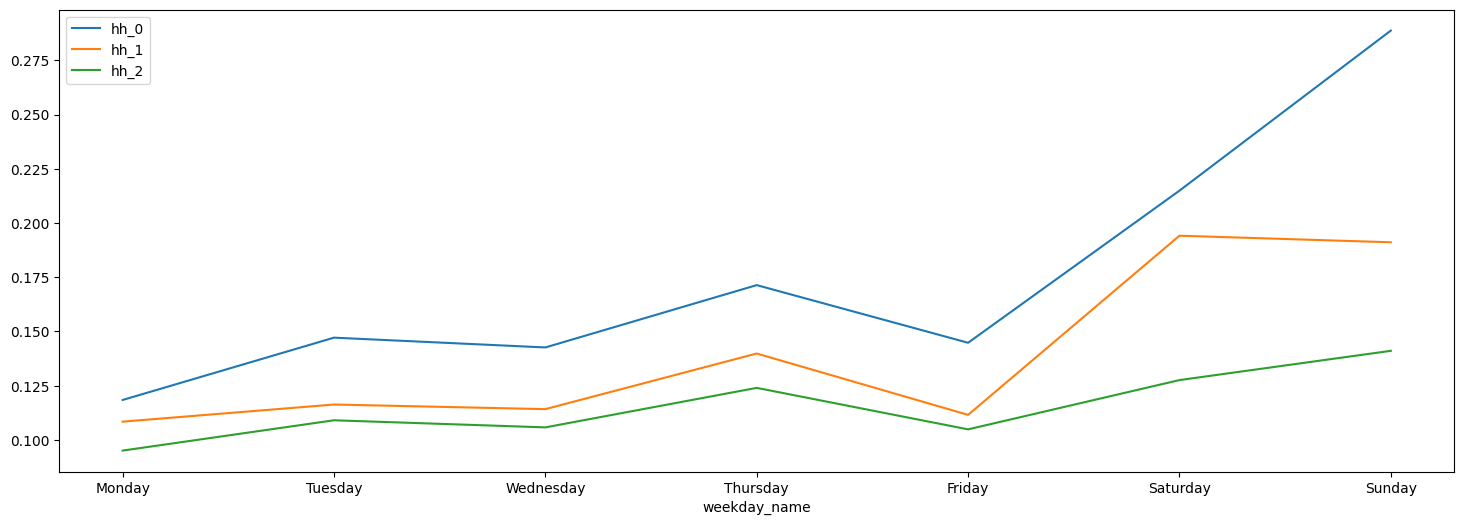

In [ ]:
daily = df.groupby(['weekday_name'])[['hh_0', 'hh_1', 'hh_2']].mean()
daily_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
daily = daily.reindex(daily_order)
daily.plot(figsize=(18,6))


We can also see that energy consumbtion peeks in Sunday "holiday obviously 😅".

### HeatMap

In [ ]:
energy_plot_df = pd.pivot_table(df, index="month_name", values='hh_0', columns="year", aggfunc="mean")

month_order = ['January', 'February', 'March', 'April', 'May', 'June',
               'July', 'August', 'September', 'October', 'November', 'December']
energy_plot_df = energy_plot_df.reindex(month_order)

energy_plot_df

year,2011,2012,2013
month_name,,,
January,NaN,0.180774,0.131710
February,NaN,0.235103,0.176786
March,NaN,0.155548,0.199452
April,NaN,0.162567,0.094375
May,NaN,0.165290,NaN
June,NaN,0.149200,NaN
July,NaN,0.157677,NaN
August,NaN,0.208065,NaN
September,NaN,0.127533,NaN


Text(0.5, 1.0, 'Energy Consumption Heatmap')

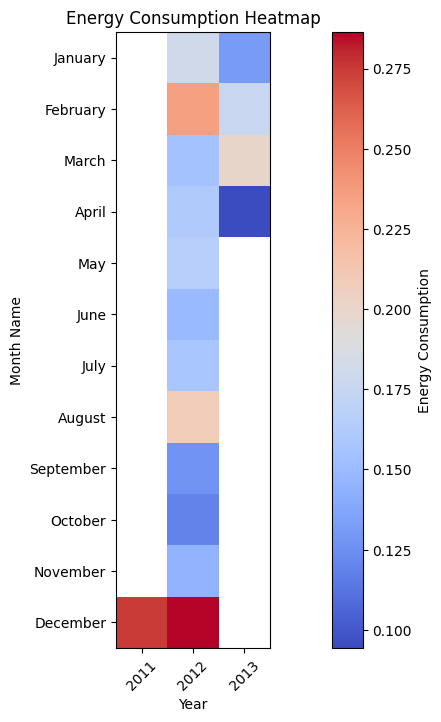

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(16, 8))
img = ax.imshow(energy_plot_df, cmap='coolwarm')
fig.colorbar(img, label='Energy Consumption')
ax.set_xticks(range(len(energy_plot_df.columns)), energy_plot_df.columns, rotation=45)
ax.set_yticks(range(len(energy_plot_df.index)), energy_plot_df.index)
ax.set_xlabel("Year")
ax.set_ylabel("Month Name")
ax.set_title("Energy Consumption Heatmap")


Same findings like before


## Time Series Decomposition


### Using Seasonal Decomposition



In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose
def plot_normal_seasonal_decomposition(ts_df, column, seasonal_period, model):

  decomposition = seasonal_decompose(ts_df[column], model=model, period=seasonal_period)
  trend = decomposition.trend
  seasonal = decomposition.seasonal
  residual = decomposition.resid
  fig, axs = plt.subplots(4, 1, figsize=(16, 16))

  axs[0].plot(ts_df[column], label='Original')
  axs[1].plot(decomposition.trend, label='Trend')
  axs[2].plot(decomposition.seasonal, label='Seasonal')
  axs[3].plot(decomposition.resid, label='Residual')
  for ax in axs:
    ax.legend()
    ax.grid()
  fig.tight_layout()

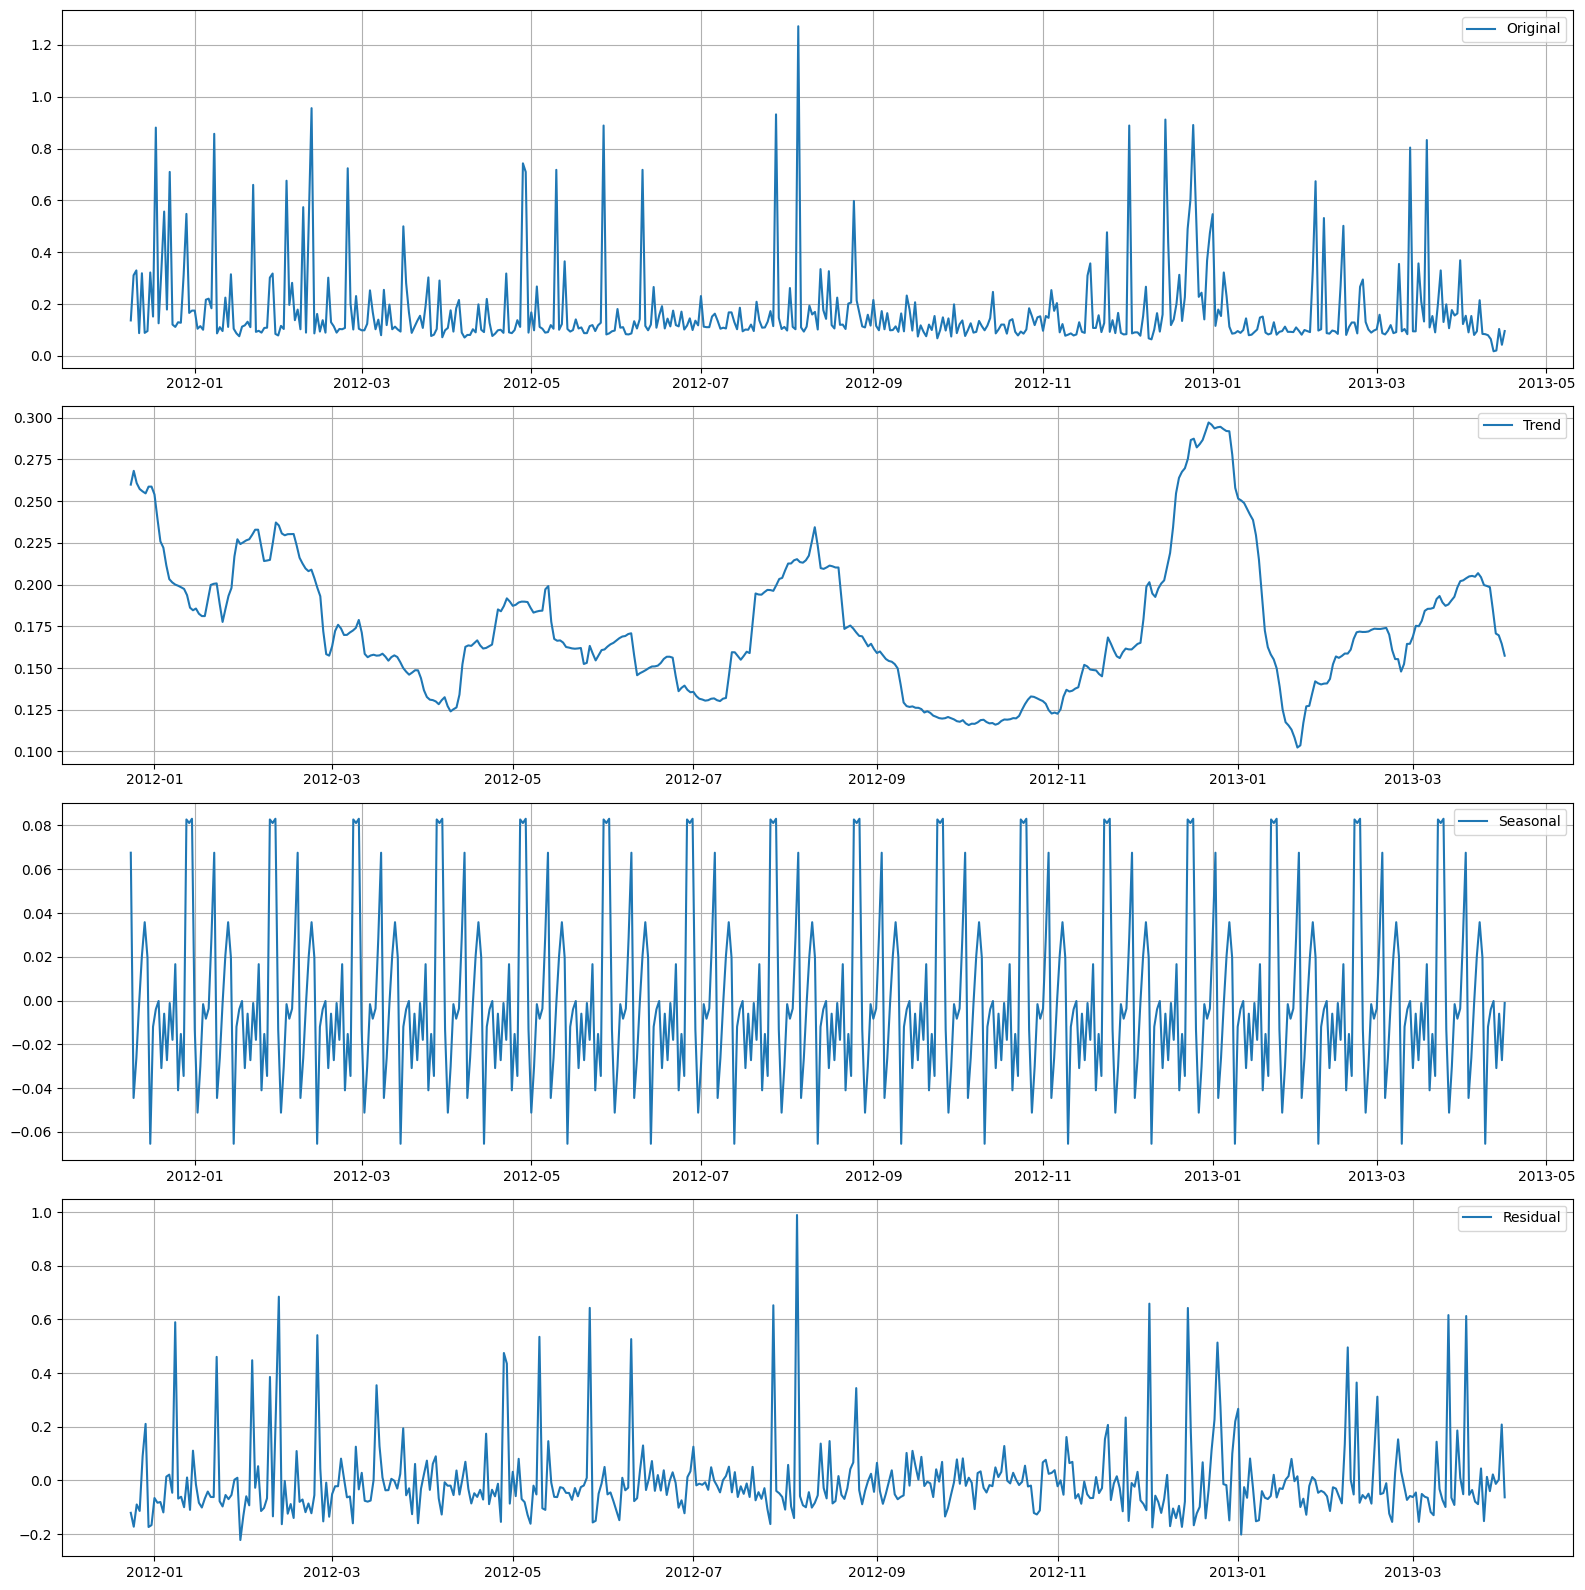

In [ ]:
plot_normal_seasonal_decomposition(df, 'hh_0', 30, 'additive')

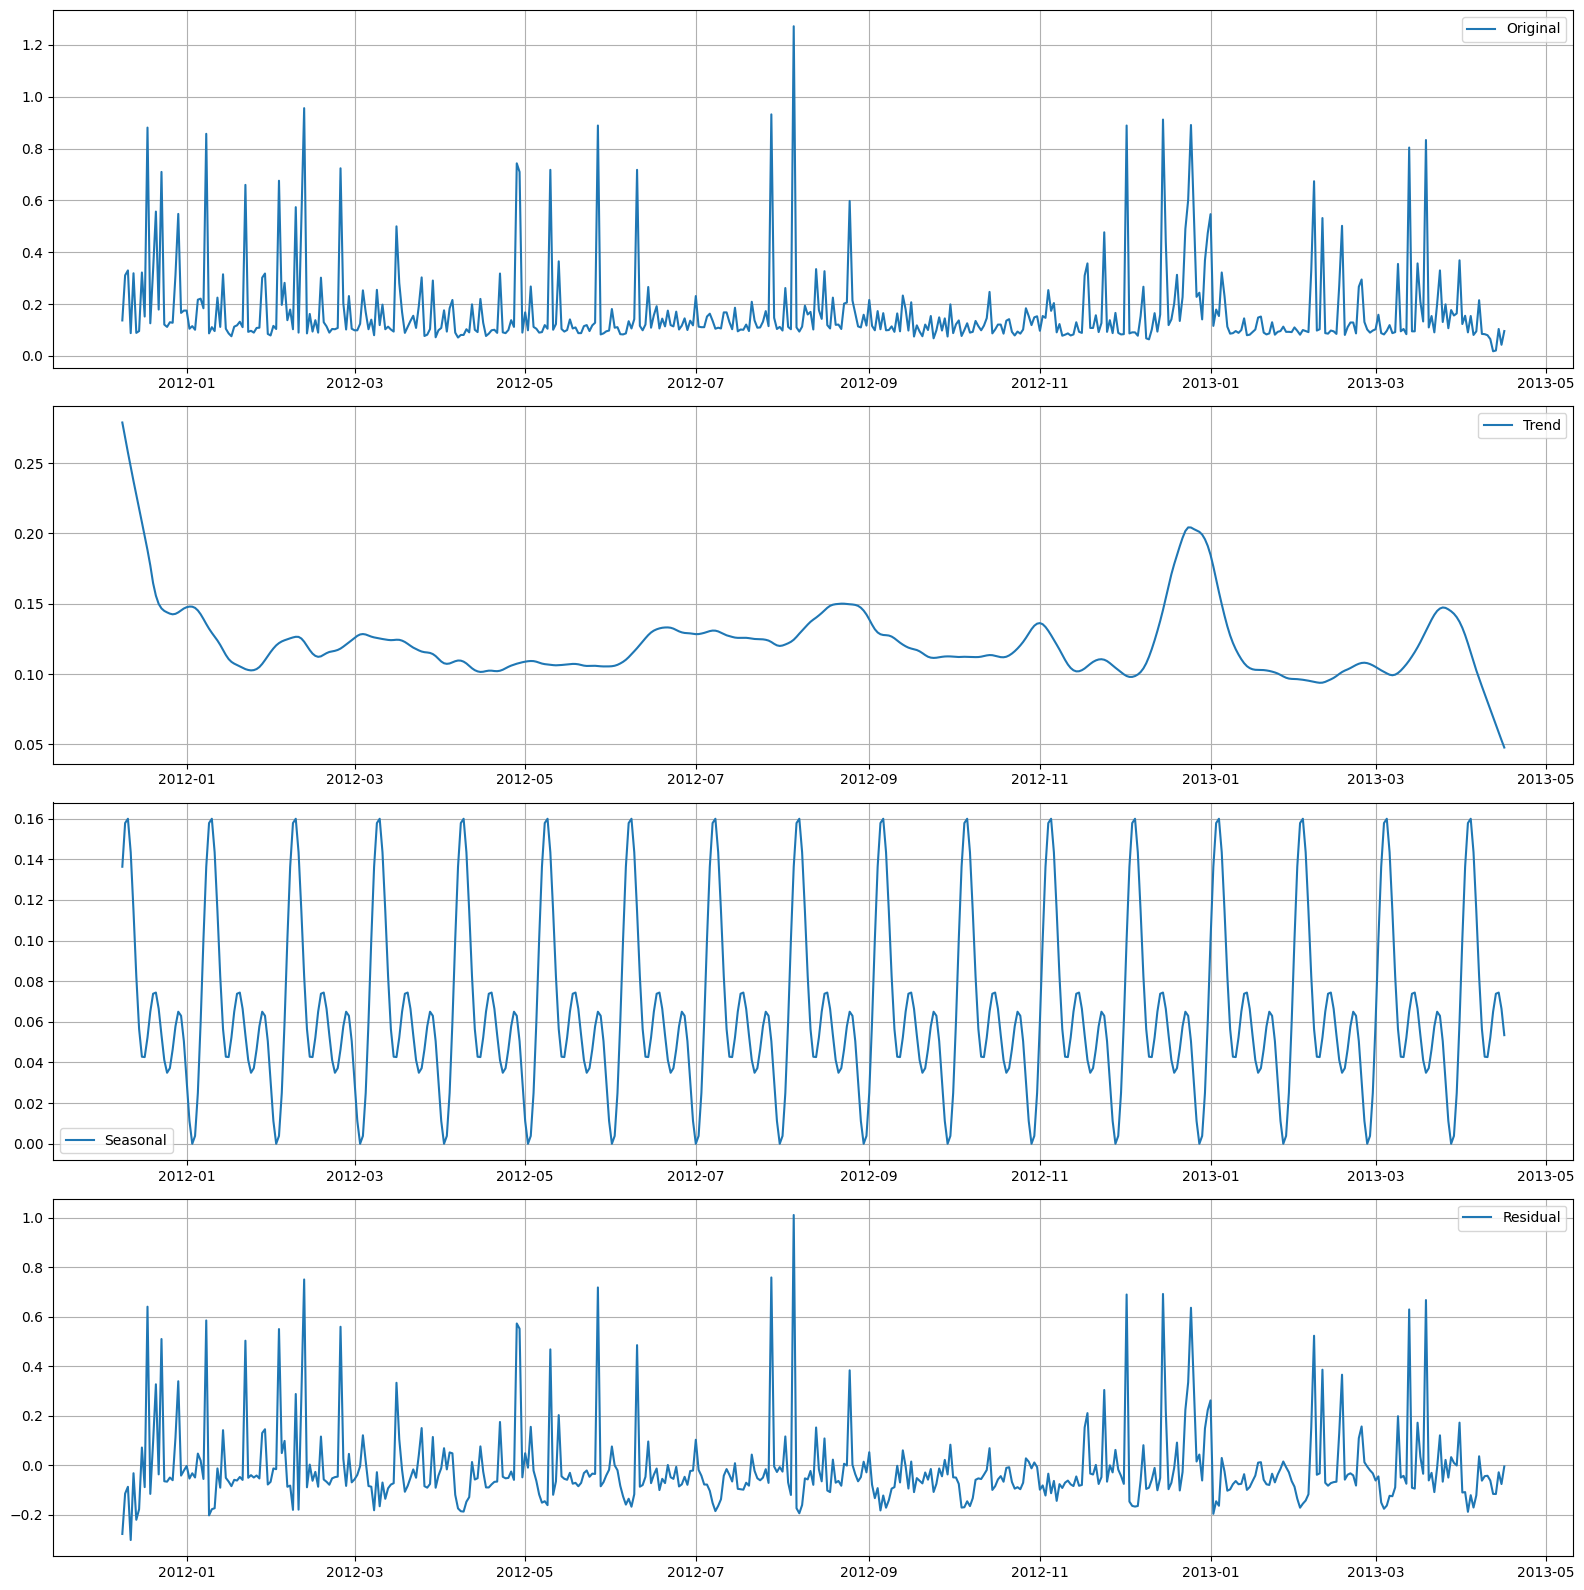

In [ ]:
from statsmodels.nonparametric.smoothers_lowess import lowess
import numpy as np

def plot_fourier_decomposition(ts_df,column, seasonal_period, num_harmonics):
    trend = lowess(ts_df[column], range(len(ts_df)), frac=0.05)[:, 1]
    detrended_series = ts_df[column] - trend

    time = np.arange(len(ts_df[column]))
    seasonal = np.zeros_like(ts_df[column])
    for i in range(1, num_harmonics + 1):
        seasonal += (np.sin(2 * np.pi * i * time / seasonal_period) +
                    np.cos(2 * np.pi * i * time / seasonal_period))

    seasonal = (seasonal - seasonal.min()) / (seasonal.max() - seasonal.min())
    seasonal = seasonal * detrended_series.std()

    residual = detrended_series - seasonal
    trend = pd.Series(index=ts_df.index, data=trend)
    seasonal = pd.Series(index=ts_df.index, data=seasonal)
    residual = pd.Series(index=ts_df.index, data=residual)

    fig, axs = plt.subplots(4, 1, figsize=(16, 16))
    axs[0].plot(ts_df[column], label='Original')
    axs[1].plot(trend, label='Trend')
    axs[2].plot(seasonal, label='Seasonal')
    axs[3].plot(residual, label='Residual')
    for ax in axs:
        ax.legend()
        ax.grid()
    fig.tight_layout()

plot_fourier_decomposition(df, 'hh_0', 30, 3)

# Refrences



1.   [Time Series Module 1](https://colab.research.google.com/drive/1H4iHkUkr7DP7CPkb6lVsprJx2p91yn3y?usp=sharing&authuser=0#scrollTo=69QgyIspyloQ)
2.   [ChatGPT](https://chatgpt.com/share/6800f8b2-bfb0-8009-8d9d-90754963eae8)
3.   Pandas Documentation and Blogs (Geeks for Geeks)

